In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [2]:
X = pd.read_csv('X.csv',header=0)
X = X.drop(['Unnamed: 0'],axis =1)
y = pd.read_csv('y.csv',header=0)
y = y.drop(['Unnamed: 0'],axis =1)

In [3]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y,random_state = 2,test_size=0.3)

### Linear Regression


In [4]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = linear_model.LinearRegression(),
X = train_x,
y = train_y, 
train_sizes = train_sizes, 
cv = 5,
scoring = 'neg_mean_squared_error')

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1


adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))


accuracy: 64.28558735658017%
Mean absolute error: 2872.2839137529763
Mean squared error: 18188908.799482055
R Squared: 0.6428558735658016
Adjusted R Squared: 0.6428200054325873


In [5]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

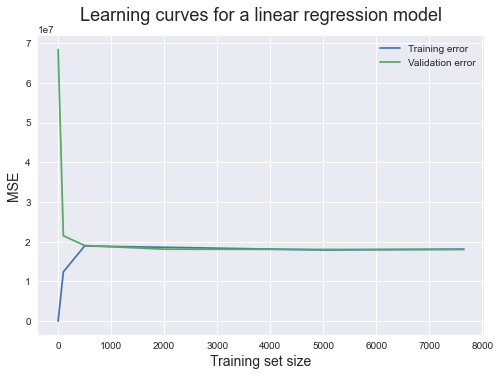

In [6]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

Mean scalling
accuracy: 44.10046560207075%
Mean absolute error: 17.866052435959766
Mean squared error: 1297.679751735954
R Squared: 0.4410046560207075
Adjusted R Squared: 0.44092610030325263

Minmax scalling (to bude to stejny jako standar scalling)
accuracy: 44.100465602070784%
Mean absolute error: 17.866052435959723
Mean squared error: 1297.679751735953
R Squared: 0.4410046560207078
Adjusted R Squared: 0.44092610030325297

Robust scalling
accuracy: 44.10046560207075%
Mean absolute error: 17.866052435959624
Mean squared error: 1297.679751735954
R Squared: 0.4410046560207075
Adjusted R Squared: 0.44092610030325263



## Lasso regresion

In [7]:
las_reg = linear_model.Lasso(alpha=0.01)
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 64.28558504235524%
Mean absolute error: 2872.2810739171523
Mean squared error: 18188909.978088196
R Squared: 0.6428558504235524
Adjusted R Squared: 0.642819982288014


In [8]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=las_reg, param_grid=param_grid, n_jobs=-1, return_train_score= True)
grid_result = grid.fit(train_x, train_y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.6423024093021823
Best Params:  {'alpha': 0.01}


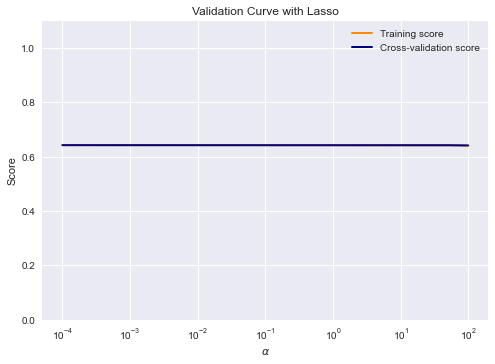

In [9]:
param_range = np.logspace(-4,2,150)
train_scores, test_scores = validation_curve(
    linear_model.Lasso(), train_x, train_y, param_name="alpha", param_range=param_range,
    scoring=None, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Lasso")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
# plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [10]:
 np.logspace(-7,3,3)

array([1.e-07, 1.e-02, 1.e+03])

#### Exploring feature selection by Lasso

In [158]:
print("Best alpha using built-in LassoCV: %f" % las_reg.alpha)
print("Best score using built-in LassoCV: %f" %las_reg.score(X,y))
coef = pd.Series(las_reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.010000
Best score using built-in LassoCV: 0.000180


In [159]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

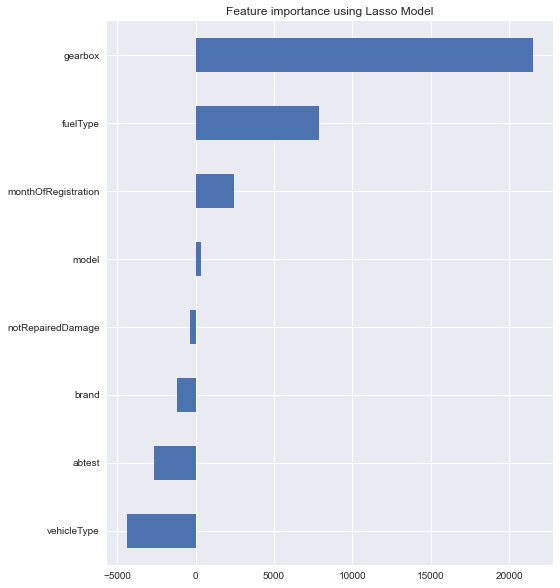

In [160]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Ridge regresion

In [31]:
rig_reg = linear_model.Ridge(alpha=10)
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 64.28555759447751%
Mean absolute error: 2872.2452532077295
Mean squared error: 18188923.956952967
R Squared: 0.6428555759447752
Adjusted R Squared: 0.6428197077816706


In [32]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=rig_reg, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(train_x, train_y)

In [33]:
print('Best Params: ', grid_result.best_params_)
print('Best Params: ', grid_result.best_score_)

Best Params:  {'alpha': 10}
Best Params:  0.6423024298609666
